In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [11]:
boston = load_boston()

In [12]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns = ['TARGET'])

df = pd.concat([features, target], axis = 1)

In [16]:
X = np.array(df['RM'])
Y = np.array(df['TARGET'])

In [17]:
from sklearn.preprocessing import MinMaxScaler            #normalization

In [29]:
scaler = MinMaxScaler()

In [30]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [31]:
X.shape

(506, 1)

In [33]:
x = scaler.fit_transform(X)
y = scaler.fit_transform(Y)

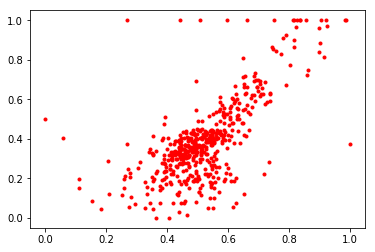

In [34]:
plt.plot(x,y,'r.')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(xtrain, ytrain)         #training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
#intercept = b (y intercept in hypothesis equation)

In [42]:
y_pred = regressor.predict(xtest)

In [43]:
y_pred

array([[ 0.76513373],
       [ 0.33519353],
       [ 0.34844157],
       [ 0.32919051],
       [ 0.13150497],
       [ 0.90382411],
       [ 0.34719956],
       [ 0.31449347],
       [ 0.3589986 ],
       [ 0.55399314],
       [ 0.40826473],
       [ 0.41550975],
       [ 0.7208356 ],
       [ 0.26709034],
       [ 0.51838904],
       [ 0.42275477],
       [ 0.3956377 ],
       [ 0.38797868],
       [ 0.40060571],
       [ 0.59373725],
       [ 0.54447111],
       [ 0.26398533],
       [ 0.44159183],
       [ 0.48920196],
       [ 0.39915671],
       [ 0.38715068],
       [ 0.34016155],
       [ 0.43455381],
       [ 0.29979643],
       [ 0.31428647],
       [ 0.60636428],
       [ 0.28220138],
       [ 0.32836251],
       [ 0.24473428],
       [ 0.4331048 ],
       [ 0.40929974],
       [ 0.30414344],
       [ 0.44428283],
       [ 0.42316878],
       [ 0.31118146],
       [ 0.49913799],
       [ 0.31325147],
       [ 0.31925449],
       [ 0.74215666],
       [ 0.29379342],
       [ 0

In [44]:
for i in zip(y_pred, ytest):                #creating tuple to compare ytest and ypred
    print(i) 

(array([0.76513373]), array([1.]))
(array([0.33519353]), array([0.08444444]))
(array([0.34844157]), array([0.31555556]))
(array([0.32919051]), array([0.29555556]))
(array([0.13150497]), array([0.24666667]))
(array([0.90382411]), array([1.]))
(array([0.34719956]), array([0.38888889]))
(array([0.31449347]), array([0.18444444]))
(array([0.3589986]), array([0.21111111]))
(array([0.55399314]), array([0.57111111]))
(array([0.40826473]), array([0.34888889]))
(array([0.41550975]), array([0.38888889]))
(array([0.7208356]), array([0.86222222]))
(array([0.26709034]), array([0.23555556]))
(array([0.51838904]), array([0.55777778]))
(array([0.42275477]), array([0.1]))
(array([0.3956377]), array([0.34666667]))
(array([0.38797868]), array([0.28444444]))
(array([0.40060571]), array([0.42444444]))
(array([0.59373725]), array([0.7]))
(array([0.54447111]), array([0.12]))
(array([0.26398533]), array([0.23777778]))
(array([0.44159183]), array([0.18]))
(array([0.48920196]), array([0.25333333]))
(array([0.399

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
mean_squared_error(ytest, y_pred)

0.02208233392753459

Text(0.5,1,'Linear Regression (Train)')

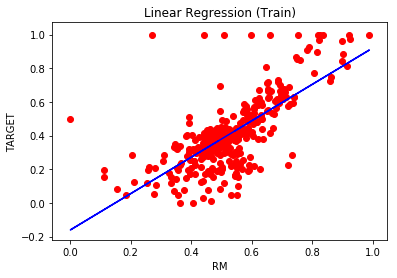

In [48]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, regressor.predict(xtrain), 'b')

plt.xlabel('RM')
plt.ylabel('TARGET')
plt.title("Linear Regression (Train)")

Text(0.5,1,'Linear Regression (Test)')

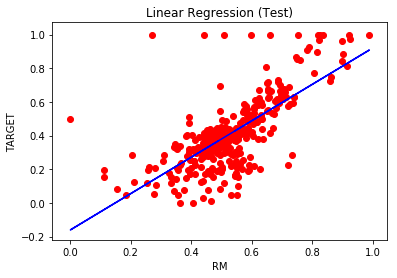

In [50]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, regressor.predict(xtrain), 'b')

plt.xlabel('RM')
plt.ylabel('TARGET')
plt.title("Linear Regression (Test)")

In [53]:
r2_score(ytest, y_pred)        #how much dataset is fit by the model (39% of the data points are fit properly)

0.39487000686087614

In [ ]:
#absolute_r2